In [1]:
import numpy as np

In [17]:
def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2

In [18]:
class LinearRegression():
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr =learning_rate
        self.iter = n_iters
        self.W = None
        self.bias = None
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.W = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.iter):
            y_pred = np.dot(X,self.W) + self.bias 

            loss = 1/(2*n_samples)*np.sum(y_pred-y)**2 
            dW = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            #update weights
            self.W -= self.lr*dW
            self.bias -= self.lr*db
    def predict(self,X_test):
        y_approx = np.dot(X_test, self.W)+ self.bias
        return y_approx


MSE: 305.7719958301902
Accuracy: 0.9253717934621964


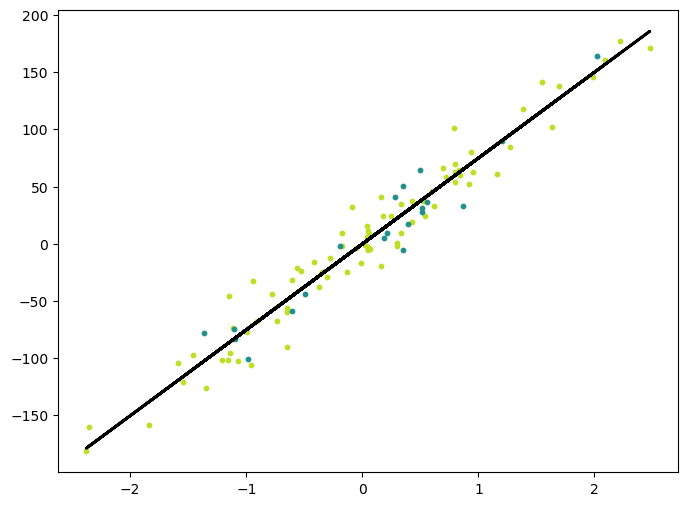

In [19]:
# Testing
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def mean_squared_error(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    X, y = datasets.make_regression(
        n_samples=100, n_features=1, noise=20, random_state=4
    )

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

    regressor = LinearRegression(learning_rate=0.01, n_iters=1000)
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    print("MSE:", mse)

    accu = r2_score(y_test, predictions)
    print("Accuracy:", accu)

    y_pred_line = regressor.predict(X)
    cmap = plt.get_cmap("viridis")
    fig = plt.figure(figsize=(8, 6))
    m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
    m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
    plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
    plt.show()